In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [7]:
import pandas as pd
import numpy as np
ir=pd.read_csv('iris.csv')

In [3]:
ir.sample(n=10,axis=0)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
105,106,7.6,3.0,6.6,2.1,Iris-virginica
41,42,4.5,2.3,1.3,0.3,Iris-setosa
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
113,114,5.7,2.5,5.0,2.0,Iris-virginica
111,112,6.4,2.7,5.3,1.9,Iris-virginica
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [4]:
ir.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [13]:
ir.fillna(ir.median(),inplace=True)

In [14]:
ir.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [17]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
ir['Species'] = lab_enc.fit_transform(ir['Species'])
ir.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
29,30,4.7,3.2,1.6,0.2,0
18,19,5.7,3.8,1.7,0.3,0
90,91,5.5,2.6,4.4,1.2,1
126,127,6.2,2.8,4.8,1.8,2
145,146,6.7,3.0,5.2,2.3,2


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [18]:
ir.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


In [ ]:
#all the predictors are having correlation >0.1 and -0.1<

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [21]:
ir.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

In [ ]:
#all the predictors are having variance>0.1 so considering all variables
#Dropping id column as it wont have no dependency on dependent variable

## Question 6

*Plot the scatter matrix for all the variables.*

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014EBA7196A0>,
      dtype=object)

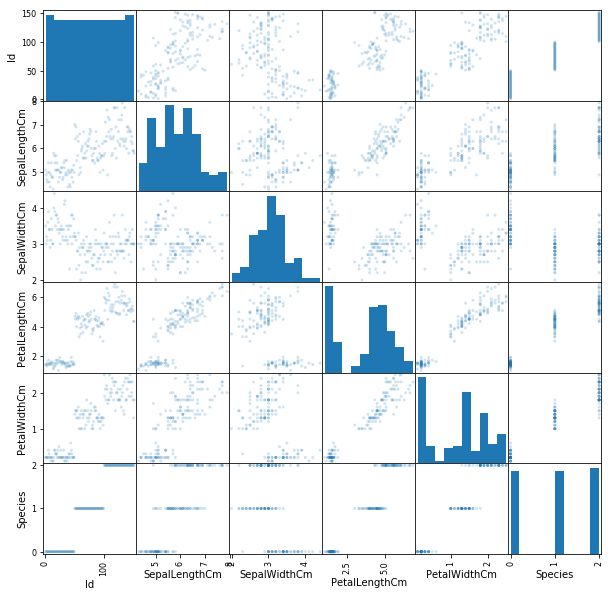

In [23]:
%matplotlib inline
pd.scatter_matrix(ir,alpha=0.2,figsize=(10,10))

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [90]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [25]:
X=ir.drop('Species',axis=1)
Y=ir['Species']

In [81]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.6,random_state=2)

In [ ]:
#not normalizing as all the units are same
#Considerng training and test sets as 40-60 as accuracy is 100% for 80-20

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [82]:
KNN3=KNeighborsClassifier(n_neighbors=3,weights='uniform',metric='euclidean')
KNN5=KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='euclidean')
KNN9=KNeighborsClassifier(n_neighbors=9,weights='uniform',metric='euclidean')

In [83]:
KNN3.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [84]:
KNN5.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [85]:
KNN9.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [86]:
Y3=KNN3.predict(x_test)

In [87]:
Y5=KNN5.predict(x_test)

In [88]:
Y9=KNN9.predict(x_test)

In [89]:
acc3=metrics.accuracy_score(y_test,Y3)
acc5=metrics.accuracy_score(y_test,Y5)
acc9=metrics.accuracy_score(y_test,Y9)
print(acc3,acc5,acc9)

0.967391304347826 0.967391304347826 0.9565217391304348


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

In [124]:
# evaluate each model in turn
results = []
names = [1,3,5,7,9,11,13,15,17,19]
MSE=[]
scoring = 'accuracy'
for name in names:    
	KNN=KNeighborsClassifier(n_neighbors=name,weights='uniform',metric='euclidean')
	kfold = model_selection.KFold(n_splits=3,random_state=2)
	cv_results = model_selection.cross_val_score(KNN, X,Y, cv=kfold, scoring=scoring)
	MSE.append(1-cv_results)
	results.append(cv_results)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

1: 0.522876 (0.400670)
3: 0.352941 (0.457610)
5: 0.019608 (0.016010)
7: 0.019608 (0.016010)
9: 0.019608 (0.016010)
11: 0.019608 (0.016010)
13: 0.019608 (0.016010)
15: 0.019608 (0.016010)
17: 0.019608 (0.016010)
19: 0.019608 (0.016010)


In [125]:
MSE

[array([0.98039216, 0.45098039, 0.        ]),
 array([0.98039216, 0.96078431, 0.        ]),
 array([0.98039216, 0.96078431, 1.        ]),
 array([0.98039216, 0.96078431, 1.        ]),
 array([0.98039216, 0.96078431, 1.        ]),
 array([0.98039216, 0.96078431, 1.        ]),
 array([0.98039216, 0.96078431, 1.        ]),
 array([0.98039216, 0.96078431, 1.        ]),
 array([0.98039216, 0.96078431, 1.        ]),
 array([0.98039216, 0.96078431, 1.        ])]

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [ ]:
# neighbours 5 is optimal after 5 the MSe is constant

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [126]:
import matplotlib.pyplot as plt


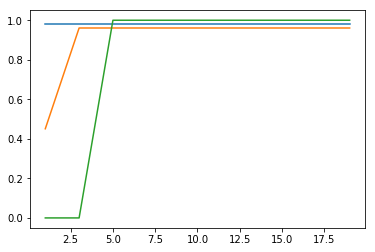

In [128]:
plt.plot(names,MSE)